In [1]:
#Data Ingestion and Extraction
from pyspark.sql import SparkSession
jobDir = "tweets10.json" # new data without label
tweets = spark.read.json([jobDir])
tweets.count() 

7991

In [2]:
tweets = tweets.select("text")

tweets.printSchema()

root
 |-- text: string (nullable = true)



In [3]:
#Model Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer

regexTokenizer = RegexTokenizer(inputCol="text", outputCol="words")

countVectors = CountVectorizer(inputCol="words", outputCol="features")



In [6]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[regexTokenizer, countVectors])
# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(tweets)
dataset = pipelineFit.transform(tweets)
dataset.show(10,50)

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                              text|                                             words|                                          features|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|ي قلب تعشق مليح واحد  تحتار تدلل تذلل واهوي ملا...|[ي, قلب, تعشق, مليح, واحد, تحتار, تدلل, تذلل, و...|(17072,[2,16,23,43,247,611,1843,2043,2760,3765,...|
|فتن منيا تثب يحاول عبث وحد بلد محمي عنا الله يق...|[فتن, منيا, تثب, يحاول, عبث, وحد, بلد, محمي, عن...|(17072,[0,9,55,142,225,977,988,1026,1338,2144,2...|
|تصريح اخيره حامد صباحي تاكد انه كاء بشر عادي كا...|[تصريح, اخيره, حامد, صباحي, تاكد, انه, كاء, بشر...|(17072,[4,19,488,646,1290,1954,2477,4022,4127,6...|
|حد ابن حلال عمل فيديوه توع ناس جنب عشان يبطل مغ...|[حد, ابن, حلال, عم

In [7]:
Data = dataset

In [8]:
from pyspark.ml.tuning import  CrossValidatorModel

In [9]:
sameCVModel = CrossValidatorModel.load("vModel")

In [44]:
x=sameCVModel.transform(Data).select("prediction").show(200,10)

+----------+
|prediction|
+----------+
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       0.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       0.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|
|       1.0|

In [57]:
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
df=sameCVModel.transform(Data)

In [59]:
sent = df["prediction"]



In [75]:
df=sameCVModel.transform(Data)


In [80]:
x=df.filter(df['prediction'] == 0).count()

In [82]:
y=df.filter(df['prediction'] == 1).count()

In [84]:
z=df.filter(df['prediction'] == 2).count()

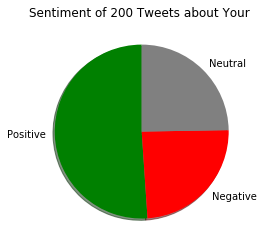

In [90]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [x, y, z]
colors = ['green', 'red', 'grey']
yourtext = "Your "

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 200 Tweets about "+yourtext)
plt.show()

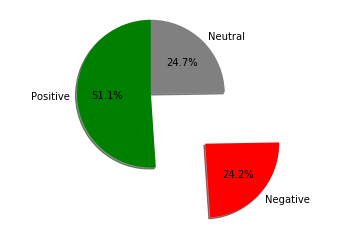

In [107]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [x, y, z]
if x > y :
    a=1.0
explode = (a, 0, 0)  
fig1, ax1 = plt.subplots()
colors = ['green', 'red', 'grey']
yourtext = "الأم"

## use matplotlib to plot the chart
ax1.pie(sizes, explode=explode, labels=labels, colors=colors , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()